Question 1:  What is Boosting in Machine Learning? Explain how it improves weak
learners.
- Boosting is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing) to create a strong learner with high accuracy.Instead of training all models independently, boosting trains them sequentially, where each new model focuses on correcting the mistakes made by the previous ones.
- Improving weak learners
 - Error Reduction: Each learner focuses on the mistakes of the previous one, reducing bias.
 - Weighted Learning: Misclassified data points are given more importance, forcing the model to learn hard cases.
 - Model Combination: Multiple weak models are combined, reducing variance and improving stability.


Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- 1. Core Idea
- AdaBoost : Adjusts sample weights so that the next weak learner focuses more on misclassified samples.
 - Error Handling :	Directly reweights samples based on classification correctness.
- Gradient Boosting : Fits the next weak learner to the residual errors (difference between predicted and actual values) of the previous model.
 - Error Handling : Uses gradient descent to minimize a loss function step-by-step.
2. Training Process
- AdaBoost
 - Start with equal sample weights.
 - Train a weak learner (e.g., decision stump).
 - Increase weights of misclassified samples.
 - Train the next weak learner with updated weights.
 - Final model = weighted vote of all learners.
- Gradient Boosting
 - Train an initial model
 - Compute residuals (errors) between predictions and actual values.
 - Train the next model on these residuals.
 - Add this new model’s predictions to improve overall performance.
 - Repeat until convergence.
3. Loss Function
- AdaBoost : Uses exponential loss to update sample weights.
- Gradient Boosting :	Can use any differentiable loss function (e.g., MSE for regression, log loss for classification).
4. Focus
- AdaBoost: Puts more emphasis on hard-to-classify samples.
- Gradient Boosting: Puts more emphasis on reducing prediction error in terms of a loss function.
5. Example Analogy
- AdaBoost: A teacher keeps giving more attention to students who failed the last test.
- Gradient Boosting: A teacher figures out exactly what topics each student got wrong, then teaches lessons focused on those topics.


Question 3: How does regularization help in XGBoost?
- XGBoost (Extreme Gradient Boosting) includes regularization to control model complexity and prevent overfitting — something that earlier boosting methods like AdaBoost did not handle explicitly.
- Helping :
 - Prevents Overfitting: Stops trees from memorizing training data.
 - Improves Generalization: Keeps the model simpler, making it perform better on unseen data.
 - Feature Selection: L1 regularization can push unimportant feature contributions to zero.


Question 4: Why is CatBoost considered efficient for handling categorical data?
- CatBoost (Categorical Boosting) is a gradient boosting library designed by Yandex that is especially good at handling categorical features without heavy preprocessing.
1. No Need for One-Hot Encoding
- Most algorithms (like XGBoost, LightGBM) require one-hot encoding or label encoding for categorical features.
- One-hot encoding can cause:
 - High dimensionality (too many columns for high-cardinality features)
 - Loss of relationship between categories
 - CatBoost can directly take categorical features as input and internally converts them into numerical values using its own method.
2. Target Statistics (Ordered Target Encoding)
- CatBoost transforms categorical features into numerical statistics based on the target variable.
- Example: For a categorical feature “Color” with values {Red, Blue, Green}, CatBoost might replace “Red” with the average target value for rows where color = Red.
- Uses ordered encoding:
 - Processes data in a way that prevents target leakage (doesn’t use the target value of the current row when encoding).
 - This avoids overfitting, which is a common issue in naive target encoding.
3. Efficient Handling of High Cardinality
- Even if a category has thousands of unique values (like “user ID” or “product ID”), CatBoost efficiently computes target statistics without exploding the feature space.
4. Automatic Combination of Categorical Features
- CatBoost can combine multiple categorical features into new features automatically (e.g., “Color + Shape”), capturing interactions between categories without manual feature engineering.
5. Benefits of This Approach
- Faster training: No huge sparse matrices from one-hot encoding.
- Better accuracy: Keeps natural ordering and relationships in categorical data.
- Less preprocessing: You just specify which columns are categorical — CatBoost handles the rest.
- Avoids overfitting: Ordered encoding and permutations prevent leakage.


Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?
- Boosting techniques (like AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost) are often chosen over bagging methods (like Random Forest) when accuracy and fine-grained error reduction are more important than just reducing variance.
1. Fraud Detection
- Why Boosting?
 - Fraud cases are rare and often hidden among normal transactions (imbalanced data).
 - Boosting focuses on hard-to-classify samples, improving recall for rare fraudulent cases.
 - Example: Detecting credit card fraud, insurance claim fraud.
2. Customer Churn Prediction
- Why Boosting?
 - Churn cases can be subtle, and boosting learns these difficult patterns by repeatedly focusing on past mistakes.
- Example: Telecom companies predicting which customers are likely to cancel service.
3. Medical Diagnosis & Risk Prediction
- Why Boosting?
 - Medical datasets are often small and imbalanced.
 - Boosting can capture complex non-linear relationships between symptoms and diseases.
- Example: Early cancer detection, heart disease risk scoring.
4. Credit Scoring & Loan Default Prediction
- Why Boosting?
 - Financial institutions need high precision and low false negatives.
 - Boosting optimizes for these by reducing bias in classification.
- Example: Predicting loan default risk.
5. Web Search Ranking & Recommendation Systems
- Why Boosting?
 - Search and recommendation require ranking, not just classification.
 - Boosting (especially LambdaMART, a gradient boosting variant) is widely used for ranking tasks.
- Example: Google Search ranking, YouTube video recommendations.
6. Image Recognition in Low-Data Scenarios
- Why Boosting?
 - When deep learning is not feasible (small dataset), boosting can combine weak learners to reach high accuracy.
- Example: Face detection in early computer vision systems (AdaBoost was used in Viola-Jones face detector).
7. Marketing Campaign Response Prediction
- Why Boosting?
 - Boosting identifies subtle patterns in customer behavior, improving targeting.
- Example: Email open rate prediction, personalized ad targeting.
- Why Boosting Over Bagging in These Cases?
 - Boosting reduces bias + variance → better accuracy in complex patterns.
 - Bagging mainly reduces variance → works better when overfitting is the main concern.
 - Boosting focuses on hard cases, making it great for imbalanced or noisy datasets.

In [1]:
"""Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.
Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy"""
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# 7. Print the result
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9649122807017544


In [2]:
"""Question 7:  Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score"""
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate performance with R-squared score
r2 = r2_score(y_test, y_pred)

# 7. Print the result
print("Gradient Boosting Regressor R-squared Score:", r2)


Gradient Boosting Regressor R-squared Score: 0.7756446042829697


In [3]:
"""Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy """
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 4. Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# 6. Fit model
grid_search.fit(X_train, y_train)

# 7. Best model from grid search
best_model = grid_search.best_estimator_

# 8. Predictions
y_pred = best_model.predict(X_test)

# 9. Accuracy score
accuracy = accuracy_score(y_test, y_pred)

# 10. Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.2}
Best Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:40:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [5]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


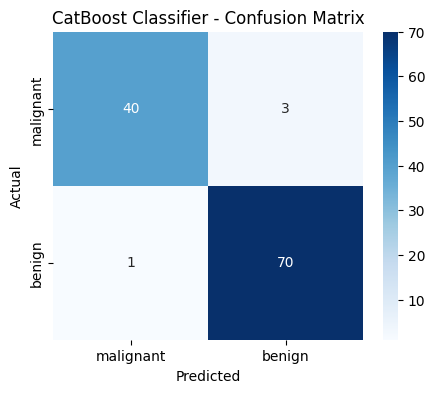

In [6]:
"""Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn"""
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,          # Suppress training logs
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)

# 6. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 7. Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Classifier - Confusion Matrix")
plt.show()


No DATA_PATH provided — generating synthetic demo dataset.
Detected 3 categorical columns: ['cat_region', 'cat_bank_type', 'cat_account_type']
Numeric columns: ['num_0', 'num_1', 'num_2', 'num_3', 'num_4', 'num_5', 'num_6', 'num_7'] (showing up to 10)
Not using SMOTE. Proceeding with original class distribution.
Class distribution (train): [3758  242]
Computed class_weights: [np.float64(0.532197977647685), np.float64(8.264462809917354)]
Starting hyperparameter tuning (RandomizedSearchCV). This may take several minutes...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 7}
Best CV score (AUC): 0.908082063492798
Refitting best model on full training set (with computed class_weights and eval set for early stopping)...
0:	test: 0.8699785	best: 0.8699785 (0)	total: 9.32ms	remaining: 1.85s
100:	test: 0.9201278	best: 0.9205643 (69)	total: 740ms	remaining: 726ms
Stopped by overfitting detector  (50 i

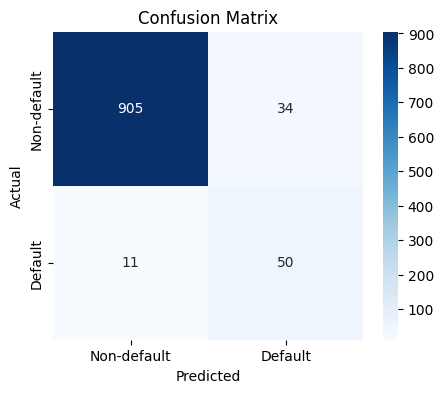

In [7]:
"""Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model """
# loan_default_pipeline_catboost.py
import sys
import subprocess
import importlib
from pathlib import Path

# ---- Auto-install missing packages (optional, safe for notebooks) ----
def ensure_pkg(pkg_name, import_name=None):
    import_name = import_name or pkg_name
    try:
        importlib.import_module(import_name)
    except ImportError:
        print(f"Package '{pkg_name}' not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg_name])
    finally:
        globals()[import_name] = importlib.import_module(import_name)

# Required packages
ensure_pkg("pandas")
ensure_pkg("numpy")
ensure_pkg("scikit-learn", "sklearn")
ensure_pkg("catboost")
# imbalanced-learn is optional (SMOTE); include if you want synthetic oversampling
try:
    ensure_pkg("imbalanced-learn", "imblearn")
    HAS_IMBLEARN = True
except Exception:
    HAS_IMBLEARN = False
    print("imblearn not available — skipping SMOTE option (you can pip install imbalanced-learn).")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool

if HAS_IMBLEARN:
    from imblearn.over_sampling import SMOTE

# ------------------ User settings ------------------
DATA_PATH = None   # <-- set to "path/to/loan_data.csv" or leave None for synthetic demo
TARGET_COL = "target"   # name of the target column in your CSV (1 = default, 0 = non-default)
RANDOM_STATE = 42
TEST_SIZE = 0.2
USE_SMOTE = False   # set True to apply SMOTE on training data (requires imblearn)
# ----------------------------------------------------

def generate_synthetic_dataset(n_samples=5000, imbalance_ratio=0.05, random_state=RANDOM_STATE):
    """
    Generates a demo dataset with numeric + categorical features and missing values.
    imbalance_ratio = fraction of positive (default) class
    """
    from sklearn.datasets import make_classification
    X_num, y = make_classification(
        n_samples=n_samples,
        n_features=8,
        n_informative=5,
        n_redundant=1,
        n_clusters_per_class=1,
        weights=[1-imbalance_ratio, imbalance_ratio],
        flip_y=0.02,
        random_state=random_state
    )
    df = pd.DataFrame(X_num, columns=[f"num_{i}" for i in range(X_num.shape[1])])
    # Add categorical features (low and medium cardinality)
    rng = np.random.RandomState(random_state)
    df["cat_region"] = rng.choice(["North","South","East","West"], size=n_samples, p=[0.25,0.25,0.3,0.2])
    df["cat_bank_type"] = rng.choice(["A","B","C","D"], size=n_samples)
    df["cat_account_type"] = rng.choice(["salaried","self_employed","business"], size=n_samples)
    # Add missing values
    for col in df.columns[:3]:
        df.loc[rng.choice(df.index, size=int(0.05*n_samples), replace=False), col] = np.nan
    df[TARGET_COL] = y
    return df

def load_data(path=None):
    if path is None:
        print("No DATA_PATH provided — generating synthetic demo dataset.")
        return generate_synthetic_dataset()
    path = Path(path)
    if not path.exists():
        raise FileNotFoundError(f"Dataset not found at {path}")
    df = pd.read_csv(path)
    if TARGET_COL not in df.columns:
        raise ValueError(f"Target column '{TARGET_COL}' not found in dataset.")
    return df

def preprocess(df, categorical_cols=None, numeric_impute_strategy="median"):
    """
    - Fills missing numeric values with median.
    - Fills missing categorical values with 'Missing'.
    - Returns X (DataFrame), y (Series), list_of_cat_cols (names).
    """
    df = df.copy()
    y = df[TARGET_COL].astype(int)
    X = df.drop(columns=[TARGET_COL])

    # Auto-detect categorical columns if not provided
    if categorical_cols is None:
        # treat object and category dtype as categorical; also small-cardinality numerics as categorical
        cat_cols = list(X.select_dtypes(include=["object","category"]).columns)
        # numeric cols with few unique values might be categorical (example thresholds)
        for col in X.select_dtypes(include=[np.number]).columns:
            if X[col].nunique() <= 10:
                cat_cols.append(col)
        cat_cols = list(dict.fromkeys(cat_cols))  # dedupe preserving order
    else:
        cat_cols = list(categorical_cols)

    num_cols = [c for c in X.columns if c not in cat_cols]

    # Impute numeric
    if num_cols:
        imputer = SimpleImputer(strategy=numeric_impute_strategy)
        X[num_cols] = imputer.fit_transform(X[num_cols])

    # Fill categorical missing
    for c in cat_cols:
        X[c] = X[c].astype(object).fillna("MISSING")

    return X, y, cat_cols

def build_catboost_model(random_state=RANDOM_STATE, class_weights=None):
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        eval_metric="AUC",
        random_state=random_state,
        early_stopping_rounds=50,
        verbose=100,
        class_weights=class_weights
    )
    return model

def tune_hyperparameters(X_train, y_train, cat_features, random_state=RANDOM_STATE, n_iter=25):
    """
    RandomizedSearchCV over some important CatBoost params.
    """
    model = CatBoostClassifier(eval_metric="AUC", random_state=random_state, verbose=0)

    param_dist = {
        "learning_rate": [0.01, 0.02, 0.03, 0.05, 0.08, 0.1],
        "depth": [4, 5, 6, 7, 8],
        "l2_leaf_reg": [1, 3, 5, 7, 9],
        "iterations": [200, 500, 800, 1200],
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

    # Wrap CatBoostClassifier to work with sklearn's RandomizedSearchCV; pass cat_features via fit_params
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring="roc_auc",
        cv=skf,
        verbose=2,
        random_state=random_state,
        n_jobs=-1,
        refit=True
    )

    # Fit with Pool to pass cat_features
    random_search.fit(X_train, y_train, cat_features=cat_features)
    print("Best params:", random_search.best_params_)
    print("Best CV score (AUC):", random_search.best_score_)
    return random_search.best_estimator_

def evaluate_and_report(model, X_test, y_test, cat_features):
    """
    Evaluate model and print metrics; plot confusion matrix.
    """
    # Use model.predict_proba if available
    pool_test = Pool(X_test, y_test, cat_features=cat_features)
    y_prob = model.predict_proba(pool_test)[:, 1]
    y_pred = model.predict(pool_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    print("\n=== EVALUATION REPORT ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {roc_auc:.4f}")
    print(f"PR-AUC   : {pr_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-default","Default"],
                yticklabels=["Non-default","Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

def main():
    # Load
    df = load_data(DATA_PATH)

    # Preprocess
    X, y, cat_cols = preprocess(df)
    print(f"Detected {len(cat_cols)} categorical columns: {cat_cols}")
    print(f"Numeric columns: {[c for c in X.columns if c not in cat_cols][:10]} (showing up to 10)")

    # Train-test split (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
    )

    # Optional: SMOTE on training set (only if imblearn available and requested)
    if USE_SMOTE and HAS_IMBLEARN:
        print("Applying SMOTE to training data...")
        # We must encode categorical for SMOTE (SMOTE works on numeric data). Use OrdinalEncoder for transform-only purpose.
        enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        X_train_enc = X_train.copy()
        X_test_enc = X_test.copy()
        if cat_cols:
            X_train_enc[cat_cols] = enc.fit_transform(X_train[cat_cols])
            X_test_enc[cat_cols] = enc.transform(X_test[cat_cols])
        sm = SMOTE(random_state=RANDOM_STATE)
        X_train_res, y_train_res = sm.fit_resample(X_train_enc, y_train)
        # After SMOTE, transform back to DataFrame (cat_cols are encoded integers)
        X_train = pd.DataFrame(X_train_res, columns=X_train_enc.columns)
        y_train = pd.Series(y_train_res)
        print("SMOTE completed. New class balance:", np.bincount(y_train.astype(int)))
    else:
        print("Not using SMOTE. Proceeding with original class distribution.")
        print("Class distribution (train):", np.bincount(y_train.astype(int)))

    # Compute class weights for CatBoost (optional)
    # CatBoost expects class_weights as list-like giving weight for each class index: [w_for_class0, w_for_class1]
    counts = np.bincount(y_train.astype(int))
    # Avoid division by zero
    if len(counts) == 1:
        counts = np.append(counts, 0)
    total = counts.sum()
    # Use inverse frequency
    w0 = total / (2 * counts[0]) if counts[0] > 0 else 1.0
    w1 = total / (2 * counts[1]) if counts[1] > 0 else 1.0
    class_weights = [w0, w1]
    print("Computed class_weights:", class_weights)

    # Tune hyperparams (randomized search) - this may take time, tune n_iter to your compute budget
    print("Starting hyperparameter tuning (RandomizedSearchCV). This may take several minutes...")
    best_model = tune_hyperparameters(X_train, y_train, cat_features=cat_cols, random_state=RANDOM_STATE, n_iter=20)

    # If you want, set class_weights and re-fit best_model for final training with early stopping on eval set
    print("Refitting best model on full training set (with computed class_weights and eval set for early stopping)...")
    final_model = CatBoostClassifier(**best_model.get_params())
    final_model.set_params(class_weights=class_weights, verbose=100, early_stopping_rounds=50)
    eval_pool = Pool(X_test, y_test, cat_features=cat_cols)
    final_model.fit(X_train, y_train, eval_set=eval_pool, cat_features=cat_cols)

    # Evaluate
    evaluate_and_report(final_model, X_test, y_test, cat_features=cat_cols)

if __name__ == "__main__":
    main()


Q10.
1. Data Preprocessing & Handling Missing/Categorical Values
- Step 1.1 – Data Cleaning
 - Missing Values (Numeric):
  - If missing rate is small → impute using median (robust against outliers).
  - If missing rate is high → consider dropping the feature or creating a “missing” flag.
 - Missing Values (Categorical):
  - Replace with a special category like "Unknown" or use CatBoost’s built-in handling (if using CatBoost).
- Step 1.2 – Encoding Categorical Variables
 - If using AdaBoost/XGBoost:
  - Apply Label Encoding (preferred for boosting) or One-Hot Encoding (only for low-cardinality features).
 - If using CatBoost:
  - No need for manual encoding — just specify cat_features parameter.
- Step 1.3 – Feature Scaling
 - Boosting algorithms don’t require standardization for decision trees, so scaling isn’t mandatory.
- Step 1.4 – Imbalanced Data Handling
 - Options:
  - Class Weighting: Assign higher weights to minority class (loan defaults).
  - SMOTE/ADASYN: Synthetic oversampling for training data.
  - Threshold Tuning: Adjust classification threshold for better recall on defaults.
2. Choice Between AdaBoost, XGBoost, or CatBoost
- Algorithm	Why Use It Here?
 - AdaBoost	Simple and interpretable, but less effective with missing values and categorical features. Not the best for this scenario.
 - XGBoost	Handles missing values, very powerful for tabular data, but needs encoding for categorical variables.
 - CatBoost	Best fit here — natively handles categorical features, missing values, and works well with imbalanced datasets. Also requires less preprocessing.
 - Choice: CatBoost (reduced preprocessing, strong performance on mixed-type data).
3. Hyperparameter Tuning Strategy
- Use GridSearchCV or RandomizedSearchCV for small datasets, or Optuna/Bayesian - Optimization for larger datasets.
- Important parameters to tune:
 - iterations (number of trees)
 - learning_rate (0.01 – 0.3)
 - depth (tree depth, e.g., 4–10)
 - l2_leaf_reg (L2 regularization)
 - class_weights (to balance classes)
- Example:
 - param_grid = {
    - 'depth': [4, 6, 8],
    - 'learning_rate': [0.01, 0.05, 0.1],
    - 'iterations': [500, 1000],
    - 'l2_leaf_reg': [1, 3, 5],
    - 'class_weights': [{0: 1, 1: 5}]  # More weight to loan defaults
- }
4. Evaluation Metrics & Why
- Since this is loan default prediction (binary classification, imbalanced):
- Primary Metric:
 - Recall / Sensitivity → We care more about catching defaulters (false negatives are costly).
- Supporting Metrics:
 - Precision → Avoid flagging too many non-defaulters as defaulters.
 - F1-score → Balance between precision and recall.
 - ROC-AUC → Measures ranking ability of the model.
 - PR-AUC → More informative in imbalanced cases.
- Business perspective: Missing a defaulter (false negative) is worse than flagging a non-defaulter (false positive).
5. Business Benefits
- Reduced Financial Loss: Correctly identifying high-risk customers prevents defaults.
- Better Credit Risk Management: Allows targeted loan approval policies.
- Customer Segmentation: Separate high-risk from low-risk customers for different interest rates.
- Regulatory Compliance: Improved risk assessment helps meet financial regulations.
- Competitive Advantage: More accurate predictions = safer loan portfolio.